# Shipwrecks of Massachusetts

## Package Imports

In [1]:
import pandas as pd
import geopandas as gpd
import requests
import matplotlib.pyplot as plt

%matplotlib inline

## Retrieve Data

The two datasets used for this project are:

1. The API response from [DiveSites.com](http://api.divesites.com/docs/) for a set of recreational SCUBA diving sites within 50 nautical miles of Boston, MA
2. A KML file from [Wikipedia](https://en.wikipedia.org/wiki/List_of_shipwrecks_of_Massachusetts) with coordinates for a subset of their listed ship wrecks of Massachusetts

In [2]:
# Get data from DiveSites.com API
ds_url = "http://api.divesites.com/?mode=sites&lat=42.35843&lng=-71.05977&dist=50"
r_ds = requests.get(ds_url)
ds_json = r_ds.json()

In [3]:
ds_json

{'request': {'str': None,
  'timestamp': 1606785098,
  'loc': {'lat': '42.35843', 'lng': '-71.05977'},
  'mode': 'sites',
  'dist': '50',
  'api': 1},
 'sites': [{'currents': None,
   'distance': '8.85',
   'hazards': None,
   'lat': '42.4196',
   'name': 'Chimneys',
   'water': None,
   'marinelife': None,
   'description': None,
   'maxdepth': None,
   'mindepth': None,
   'predive': None,
   'id': '21163',
   'equipment': None,
   'lng': '-70.9074'},
  {'currents': None,
   'distance': '8.87',
   'hazards': None,
   'lat': '42.4227',
   'name': '40 Steps',
   'water': None,
   'marinelife': None,
   'description': None,
   'maxdepth': None,
   'mindepth': None,
   'predive': None,
   'id': '21164',
   'equipment': None,
   'lng': '-70.9093'},
  {'currents': None,
   'distance': '8.98',
   'hazards': None,
   'lat': '42.3738',
   'name': 'Romance',
   'water': None,
   'marinelife': None,
   'description': None,
   'maxdepth': None,
   'mindepth': None,
   'predive': None,
   'id': '

The JSON top-level structure is:

```py
{'request': {...}
 'sites': [{}, {}, ...]
 'version': 1,
 'loc': {'lat': '42.35843', 'lng': '-71.05977'},
 'result': True}
```

The dive sites are stored under the `sites` key as a list of objects, each with the form:

```py
{'currents': None,
 'distance': '8.85',
 'hazards': None,
 'lat': '42.4196',
 'name': 'Chimneys',
 'water': None,
 'marinelife': None,
 'description': None,
 'maxdepth': None,
 'mindepth': None,
 'predive': None,
 'id': '21163',
 'equipment': None,
 'lng': '-70.9074'}
```

In [4]:
len(ds_json['sites'])

34

In [5]:
# Create temporary DataFrame of Mass dive sites
ds_tmp_df = pd.DataFrame(ds_json['sites'])

In [6]:
# Convert to GeoDataFrame
ds_df = gpd.GeoDataFrame(ds_tmp_df,
                         geometry=gpd.points_from_xy(
                             ds_tmp_df.lng,
                             ds_tmp_df.lat))

# Set CRS
ds_df.crs = "EPSG:4326"

ds_df.head()

,currents,distance,hazards,lat,name,water,marinelife,description,maxdepth,mindepth,predive,id,equipment,lng,geometry
0,None,8.85,None,42.4196,Chimneys,None,None,None,None,None,None,21163,None,-70.9074,POINT (-70.90740 42.41960)
1,None,8.87,None,42.4227,40 Steps,None,None,None,None,None,None,21164,None,-70.9093,POINT (-70.90930 42.42270)
2,None,8.98,None,42.3738,Romance,None,None,None,None,None,None,22878,None,-70.8852,POINT (-70.88520 42.37380)
3,None,16.74,None,42.3842,Baleen Wreck,None,None,None,None,None,None,16771,None,-70.7337,POINT (-70.73370 42.38420)
4,None,17.34,None,42.2403,Minot Beach,None,None,None,None,None,None,22299,None,-70.7605,POINT (-70.76050 42.24030)


In [7]:
ds_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

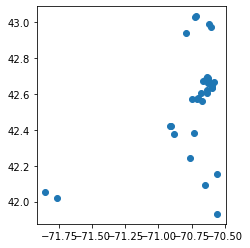

In [8]:
ds_df.plot()

In [32]:
# Create GeoDataFrame of Mass shipwrecks
df = gpd.read_file('./Data/MA_Shipwrecks_AllCounties.shp', driver='shapefile')

# Drop Z dimension of polygons that occurs often in the .kml format
df.geometry = df.geometry.map(lambda polygon: shapely.ops.transform(lambda x, y, z: (x, y), polygon))

df.head()

,Name,descriptio,timestamp,begin,end,altitudeMo,tessellate,extrude,visibility,drawOrder,icon,snippet,geometry
0,Dixie Sword,"<br>Source: Wikipedia article <a href=""https:/...",None,None,None,None,-1,0,-1,None,None,None,POINT (-69.98056 41.54944)
1,SS James Longstreet,"<br>Source: Wikipedia article <a href=""https:/...",None,None,None,None,-1,0,-1,None,None,None,POINT (-70.04424 41.83146)
2,USS Merrimack (1798),"<br>Source: Wikipedia article <a href=""https:/...",None,None,None,None,-1,0,-1,None,None,None,POINT (-69.74900 42.12600)
3,Pendleton,"<br>Source: Wikipedia article <a href=""https:/...",None,None,None,None,-1,0,-1,None,None,None,POINT (-69.96250 41.58611)
4,HMS Somerset,"<br>Source: Wikipedia article <a href=""https:/...",None,None,None,None,-1,0,-1,None,None,None,POINT (-70.14806 42.07611)


In [33]:
len(df)

49

In [35]:
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich